In [1]:
# Imports
import pandas as pd
import seaborn as sns
import time
import numpy as np
import matplotlib.pyplot as plt
import calendar
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14})

# Constants
CNT = 'count'
LAT = 'latitude'
LNG = 'longitude'
DESC = 'description'
DT = 'datetime'
ADDR = 'address'
TWP = 'town'
ZIP = 'zip'
TITLE = 'title'
MONTH = 'month'
DAY = 'day'
WEEKDAY = 'weekday'
HOUR = 'hour'
YEAR = 'year'
RSN = 'reason'
SVC = 'service'
ST = 'station'
P = 'period'

months = {
    '01': 'Jan',
    '02': 'Fev',
    '03': 'Mar',
    '04': 'Abr',
    '05': 'Mai',
    '06':  'Jun',
    '07': 'Jul',
    '08': 'Ago',
    '09': 'Set',
    '10': 'Out',
    '11': 'Nov',
    '12': 'Dez'
}

weekdays = {
    '0': 'Seg',
    '1': 'Ter',
    '2': 'Qua',
    '3': 'Qui',
    '4': 'Sex',
    '5': 'Sáb',
    '6': 'Dom'
}

In [2]:
original_df = pd.read_csv('./911.csv')

# Projeto em Ciência de Dados, Análise e Visualização de Dados 2020PGS2M2

## Análise do dataset 911.csv

#### Gustavo Yamauchi Caruso

## Agenda

### Apresentação do dataset
- Contexto 
- Visão geral
- Transformações

### Classificação das variáveis do dataset

### Análise
- Perguntas diretas
- Representações visuais


# Apresentação do dataset


911 é um número de emergência norte americano. Diferentemente do Brasil, todos os serviços de emergência podem ser acessados diretamente deste único número.

Cada linha do dataset 911.csv consiste em um conjunto de informações sobre uma ligação de emergência.

## Visão Geral

Foram registrados, para cada uma das **99492** linhas do dataset: 

In [3]:
df = pd.read_csv('./911.csv')

In [4]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


- `lat` -> Latitude
- `lng` -> Longitude
- `desc` -> Descrição
- `zip` -> CEP
- `title` -> Título
- `timeStamp` -> Data e Hora
- `twp` -> Cidade
- `addr` -> Endereço
- `E` -> flag 

As ligações foram realizadas entre 10 de Dezembro de 2015 e 24 de Agosto de 2016

In [5]:
print('Shape', df.shape)
print('Colunas', df.columns)
print('Primeira chamada: ', df['timeStamp'].min())
print('Última chamada: ', df['timeStamp'].max())

Shape (99492, 9)
Colunas Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')
Primeira chamada:  2015-12-10 17:40:00
Última chamada:  2016-08-24 11:17:02


### Valores nulos

In [6]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

## Transformações

A seguir, algumas transformações serão realizadas nas colunas deste dataset. A primeira consistirá em renomear as colunas para carregarem o nome completo.

In [7]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


In [8]:
df = df.rename(
    columns={
        "lat": LAT, 
        "lng": LNG, 
        "desc": DESC, 
        "addr": ADDR,
        "timeStamp": DT,
        "twp": TWP,
        "e": CNT
    })

### `datetime`
A coluna `datetime` está carregando todas as informações de data e hora. Ao quebrá-la em ano, mês, dia, dia da semana, hora e período, análises mais interessantes são possibilitadas.

In [9]:
df[DT][0]

'2015-12-10 17:40:00'

In [10]:
df[DT] = pd.DatetimeIndex(df[DT])
df[MONTH] = df[DT].apply(lambda date_time: date_time.strftime('%m'))
df[HOUR] = df[DT].apply(lambda date_time: date_time.strftime('%H'))
df[DAY] = df[DT].apply(lambda date_time: date_time.strftime('%d'))
df[YEAR] = df[DT].apply(lambda date_time: date_time.strftime('%Y'))
df[WEEKDAY] = df[DT].apply(lambda date_time: date_time.strftime('%w'))
df[P] = df[HOUR].apply(lambda x: '00:00-06:00' if x > '00' and x < '06' else '06:00-12:00' if x > '05' and x < '12' else '12:00-18:00' if x > '11' and x < '18' else '18:00-00:00')

In [11]:
df.head(1)

,latitude,longitude,description,zip,title,datetime,town,address,count,month,hour,day,year,weekday,period
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,12,17,10,2015,4,12:00-18:00


### `title`
A coluna `title` contém mais de uma informação importantíssima para qualquer análise deste dataset: o serviço contatado e o motivo.

In [12]:
print(df[TITLE][0])
print(df[TITLE][1])
print(df[TITLE][2])

EMS: BACK PAINS/INJURY
EMS: DIABETIC EMERGENCY
Fire: GAS-ODOR/LEAK


In [13]:
def split_title(title, delimiter, idx):
    arr = title.split(':')
    if len(arr) <= idx:
        return arr[0]
    else:
        return arr[idx]
        
df[SVC] = df[TITLE].apply(lambda title: split_title(title, ':', 0))
df[RSN] = df[TITLE].apply(lambda title: split_title(title, ':', 1))
df[RSN] = df[RSN].str.replace('-', '').str.strip()

In [58]:
df.head(1)

,latitude,longitude,zip,town,address,month,hour,day,year,weekday,period,service,reason
0,40.297876,-75.581294,19525.0,new hanover,reindeer ct & dead end,12,17,10,2015,4,12:00-18:00,ems,back pains/injury


### `description`

A coluna `description` parece apresentar mais de uma informação em sua composição:

In [14]:
print(df[DESC][0])
print(df[DESC][100])
print(df[DESC][200])
print(df[DESC][350])

REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;
CEDAR LN & WILLOW LN;  NEW HANOVER; Station 332; 2015-12-10 @ 22:22:38;
CAMPUS DR & BUCK RD; BRYN ATHYN; 2015-12-11 @ 09:29:49-Station:STA11;
W CHURCH RD & WASHINGTON LN; CHELTENHAM; 2015-12-11 @ 16:10:41;


Comparativo entre as informações presentes em `description` e `datetime`,  `town` e `address`:

In [15]:
def print_addr_desc_dt_town(idx):
    print(f'\nItem {idx}')
    print(DESC + ': ', df[DESC][idx])
    print(ADDR + ': ', df[ADDR][idx])
    print(TWP + ': ', df[TWP][idx])
    print(DT + ': ', df[DT][idx])

In [16]:
print_addr_desc_dt_town(0)
print_addr_desc_dt_town(100)
print_addr_desc_dt_town(200)
print_addr_desc_dt_town(350)


Item 0
description:  REINDEER CT & DEAD END;  NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;
address:  REINDEER CT & DEAD END
town:  NEW HANOVER
datetime:  2015-12-10 17:40:00

Item 100
description:  CEDAR LN & WILLOW LN;  NEW HANOVER; Station 332; 2015-12-10 @ 22:22:38;
address:  CEDAR LN & WILLOW LN
town:  NEW HANOVER
datetime:  2015-12-10 22:27:02

Item 200
description:  CAMPUS DR & BUCK RD; BRYN ATHYN; 2015-12-11 @ 09:29:49-Station:STA11;
address:  CAMPUS DR & BUCK RD
town:  BRYN ATHYN
datetime:  2015-12-11 09:32:01

Item 350
description:  W CHURCH RD & WASHINGTON LN; CHELTENHAM; 2015-12-11 @ 16:10:41;
address:  W CHURCH RD & WASHINGTON LN
town:  CHELTENHAM
datetime:  2015-12-11 16:12:02


Nota-se também que existe a informação de Station na coluna `description`. Resta descobrir se está presente em uma quantidade razoável das linhas.

In [17]:
df[DESC].str.split(';', expand=True)[2].str.contains('Station').value_counts()

True     63797
False    35695
Name: 2, dtype: int64

Existe um número considerável de linhas sem essa informação. É importante manter isso em mente, caso escolha fazer análises com `station`. Para fins deste trabalho, seguiremos sem esta informação.

### Preenchendo linhas com o campo `address` NaN
De acordo com o slide de **Valores nulos**, a coluna `address` tinha 519 linhas nulas.

In [18]:
address_column_from_description = df[DESC].str.split(';', expand=True)[0].str.strip()
address_column_from_description.value_counts()

SHANNONDELL DR & SHANNONDELL BLVD      938
                                       519
MAIN ST & OLD SUMNEYTOWN PIKE          390
THE FAIRWAY  & RYDAL RD                260
GULPH RD & KIRK AVE                    235
                                      ... 
CREEKVIEW DR & OLD PENLLYN PIKE          1
OLD GULPH RD & MONTGOMERY SCHOOL LN      1
ROMANO DR & BELVOIR RD                   1
CHERRY LN & RYDAL RD                     1
PARK DR & N ADAMS ST                     1
Name: 0, Length: 21915, dtype: int64

Parece que temos valores em branco para `address` extraído do campo `description`. E coincidentemente, é o exato número que apareceu anteriormente na contagem de nulos do DataFrame. Isso levanta a suspeita de que não será possível preencher esse dado.

In [19]:
np.unique(address_column_from_description.isnull().index == df[ADDR].isnull().index)

array([ True])

Infelizmente, os endereços encontrados na coluna `description` não foram úteis.

### Preenchendo linhas com o campo `town` NaN
De acordo com o slide de **Valores Nulos**, existem 43 linhas com o campo `town` nulo.

In [20]:
town_column_from_description = df[DESC].str.split(';', expand=True)[1].str.strip()
town_column_from_description.value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
SALFORD           163
GREEN LANE         51
                   43
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: 1, Length: 69, dtype: int64

Parece que temos valores em branco para `town` extraída do campo `description`. E coincidentemente, é o exato número que apareceu anteriormente na contagem de nulos do DataFrame. Isso levanta a suspeita de que não será possível preencher esse dado.

In [21]:
town_column_from_description = town_column_from_description.replace('', np.nan)
np.unique(town_column_from_description.isnull().index == df[TWP].isnull().index)

array([ True])

Infelizmente, as cidades encontradas na coluna `description` não foram úteis.

### Captalização de Letras

Para seguir um padrão e ter todo o texto de uma mesma forma, as colunas de texto serão convertidas para letras minúsculas

In [22]:
df[TWP] = df[TWP].str.lower()
df[ADDR] = df[ADDR].str.lower()
df[SVC] = df[SVC].str.lower()
df[RSN] = df[RSN].str.lower()

In [23]:
df.head(1)

,latitude,longitude,description,zip,title,datetime,town,address,count,month,hour,day,year,weekday,period,service,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,new hanover,reindeer ct & dead end,1,12,17,10,2015,4,12:00-18:00,ems,back pains/injury


### Limpeza de dados
Algumas colunas que não serão necessárias podem ser deletadas do DataFrame

In [24]:
df = df.drop(columns=[DT, DESC, TITLE, CNT])

In [25]:
df.head(1)

,latitude,longitude,zip,town,address,month,hour,day,year,weekday,period,service,reason
0,40.297876,-75.581294,19525.0,new hanover,reindeer ct & dead end,12,17,10,2015,4,12:00-18:00,ems,back pains/injury


Como não foi possível preencher `town`, `address` ou `zip` para as linhas que contém NaN, é possivel deletá-las, caso análises envolvendo esses campos sejam feitas.

In [60]:
df = df.dropna()

## Classificação das Variáveis:



In [26]:
df.head(1)

,latitude,longitude,zip,town,address,month,hour,day,year,weekday,period,service,reason
0,40.297876,-75.581294,19525.0,new hanover,reindeer ct & dead end,12,17,10,2015,4,12:00-18:00,ems,back pains/injury


### Quantitativas Contínuas: 
- latitude 
- longitude

### Qualitativas Nominais
- zip
- town
- address
- service
- reason


### Qualitativas Ordinais
- day
- weekday
- month
- hour
- year

## Análise

## Perguntas diretas

### Quais as 5 causas mais recorrentes dentre as ligações registradas?

In [28]:
df[RSN].value_counts().head(5)

vehicle accident         28639
disabled vehicle          7703
fire alarm                5510
respiratory emergency     5112
cardiac emergency         5012
Name: reason, dtype: int64

### Qual o serviço mais chamado?

In [29]:
df[SVC].value_counts().head(1)

ems    48877
Name: service, dtype: int64

### Para cada serviço, quais os 5 motivos de ligação mais recorrentes?

In [30]:
df[df[SVC] == 'ems'][RSN].value_counts().head(5)

respiratory emergency    5112
cardiac emergency        5012
fall victim              4863
vehicle accident         3935
subject in pain          2687
Name: reason, dtype: int64

In [31]:
df[df[SVC] == 'fire'][RSN].value_counts().head(5)

fire alarm            5496
vehicle accident      1638
fire investigation    1460
gasodor/leak          1028
building fire          807
Name: reason, dtype: int64

In [32]:
df[df[SVC] == 'traffic'][RSN].value_counts().head(5)

vehicle accident             23066
disabled vehicle              7702
road obstruction              3144
hazardous road conditions     1086
vehicle fire                   553
Name: reason, dtype: int64

### Quais as 5 cidades que registraram mais ocorrências?

In [33]:
df[TWP].value_counts().head(5)

lower merion    8443
abington        5977
norristown      5890
upper merion    5227
cheltenham      4575
Name: town, dtype: int64

### Qual foi o mês que mais registrou ocorrências?

In [34]:
df[MONTH].value_counts().head(1)

01    13205
Name: month, dtype: int64

In [35]:
months.get('01')

'Jan'

### Qual foi o dia do mês que mais registrou ocorrências? E da semana?

In [36]:
df[DAY].value_counts().head(1)

23    4185
Name: day, dtype: int64

In [37]:
df[WEEKDAY].value_counts().head(1)

2    15150
Name: weekday, dtype: int64

In [38]:
weekdays.get('2')

'Qua'

### Representações visuais

In [39]:
S = (6, 3)
M = (10, 5)
L = (20, 10)
CM = 'Paired'

def plot_simple_value_counts_with_rename(df, column, title, x_name, y_name, rename, figsize=M, colormap=CM):
    df[column].value_counts().rename(rename).reindex(rename.values()).plot.bar(title=title, figsize=figsize, colormap=colormap)
    plt.xlabel(x_name)
    plt.ylabel(y_name)

def plot_simple_value_counts(df, column, title, x_name, y_name, figsize=M, colormap=CM):
    df[column].value_counts().sort_index().plot.bar(title=title, figsize=figsize, colormap=colormap)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    
def plot_simple_sns_count_with_hue(title, x_name, y_name, x, data, hue, order, figsize):
    plt.style.use('seaborn-pastel')
    plt.subplots(figsize=figsize)
    sns.countplot(x=x, data=data, hue=hue, order=order)
    plt.legend(loc=1)
    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)        

### Ligações por ano

Vale ressaltar que o primeiro registro é do dia 10 de Dezembro de 2015.

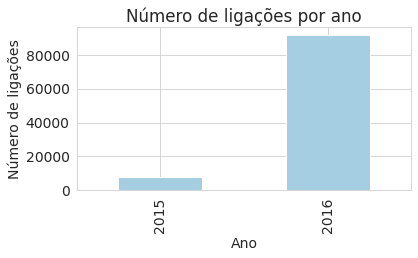

In [40]:
plot_simple_value_counts(df, YEAR, 'Número de ligações por ano', 'Ano', 'Número de ligações', S)

### Ligações por mês

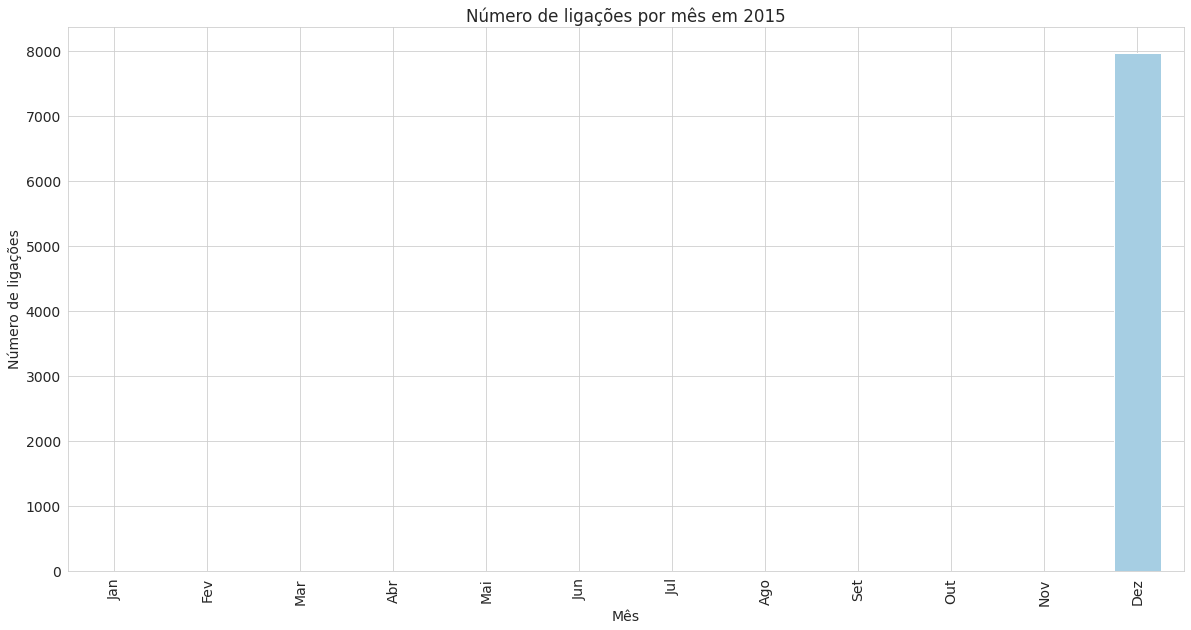

In [41]:
plot_simple_value_counts_with_rename(df[df[YEAR] == '2015'], MONTH, 'Número de ligações por mês em 2015', 'Mês', 'Número de ligações', months, L)

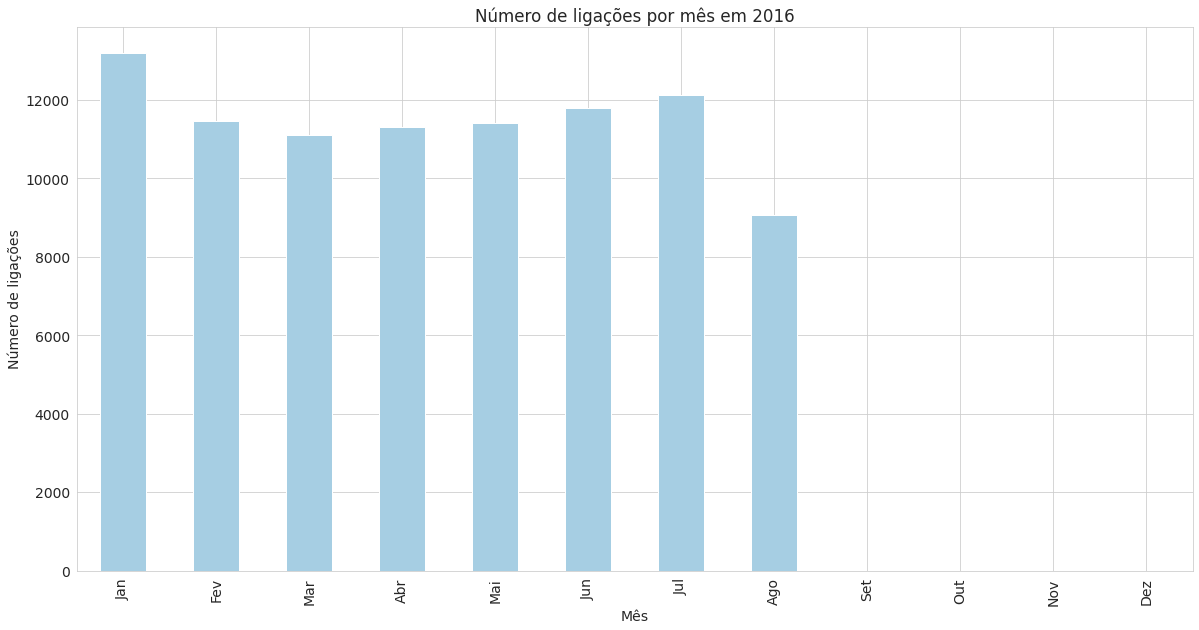

In [42]:
plot_simple_value_counts_with_rename(df[df[YEAR] == '2016'], MONTH, 'Número de ligações por mês em 2016', 'Mês', 'Número de ligações', months, L)

### Ligações por dia do mês

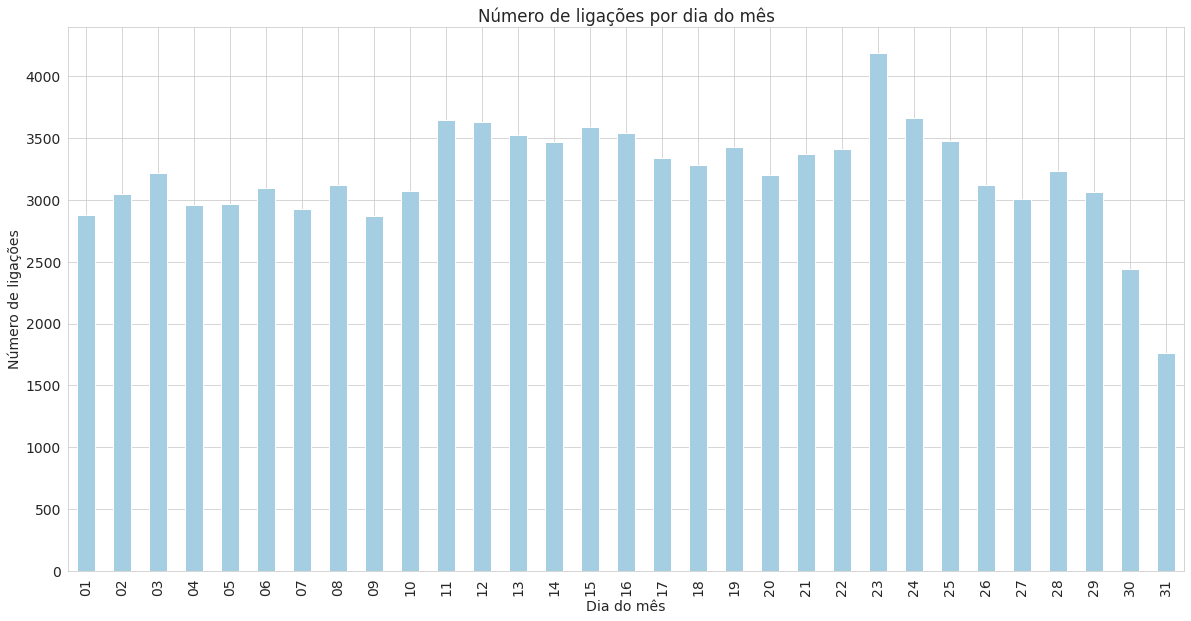

In [43]:
plot_simple_value_counts(df, DAY, 'Número de ligações por dia do mês', 'Dia do mês', 'Número de ligações', L)

### Ligações por dia da semana

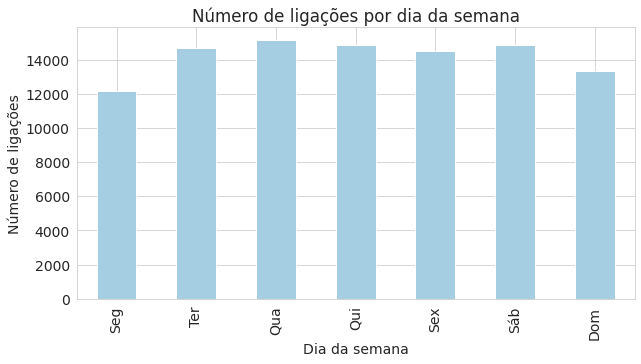

In [44]:
plot_simple_value_counts_with_rename(df, WEEKDAY, 'Número de ligações por dia da semana', 'Dia da semana', 'Número de ligações', weekdays)

### Ligações por período

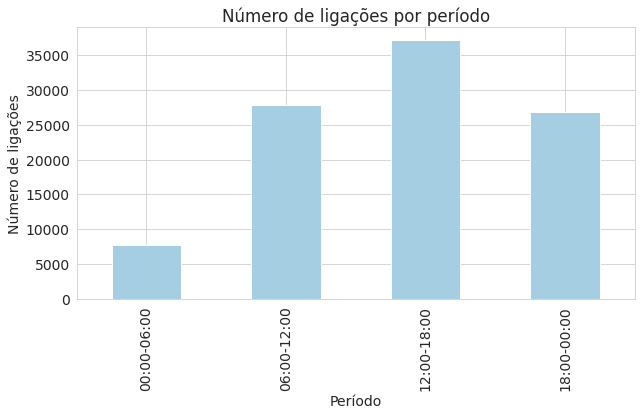

In [45]:
plot_simple_value_counts(df, P, 'Número de ligações por período', 'Período', 'Número de ligações')

### Ligações por hora

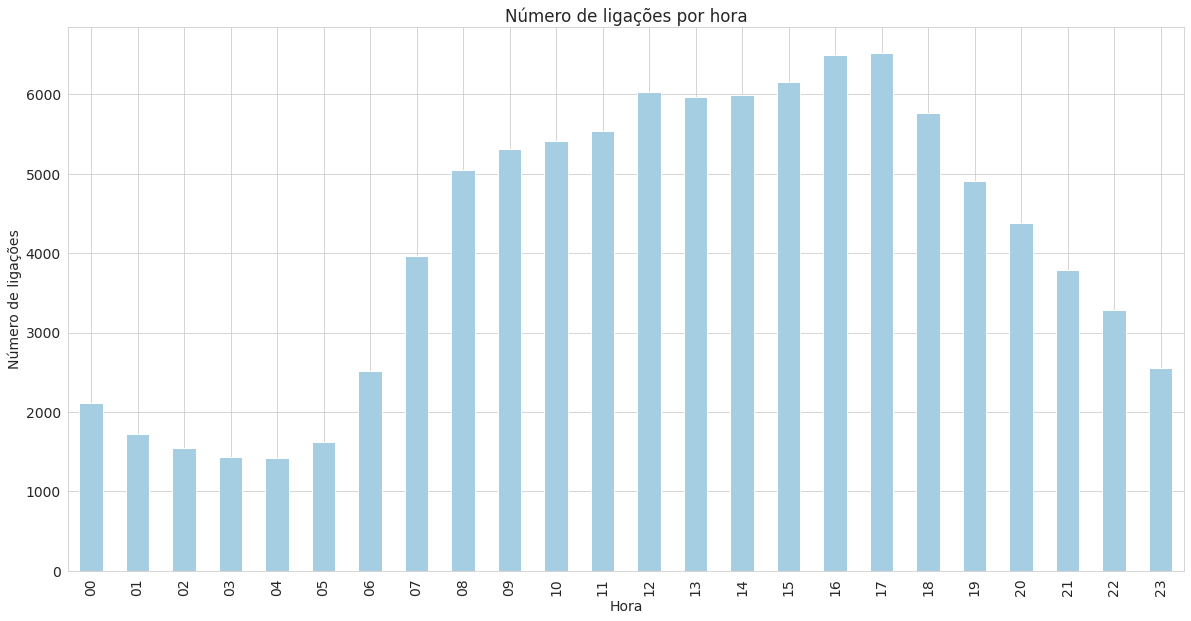

In [46]:
plot_simple_value_counts(df, HOUR, 'Número de ligações por hora', 'Hora', 'Número de ligações', L)

### Ligações por motivo

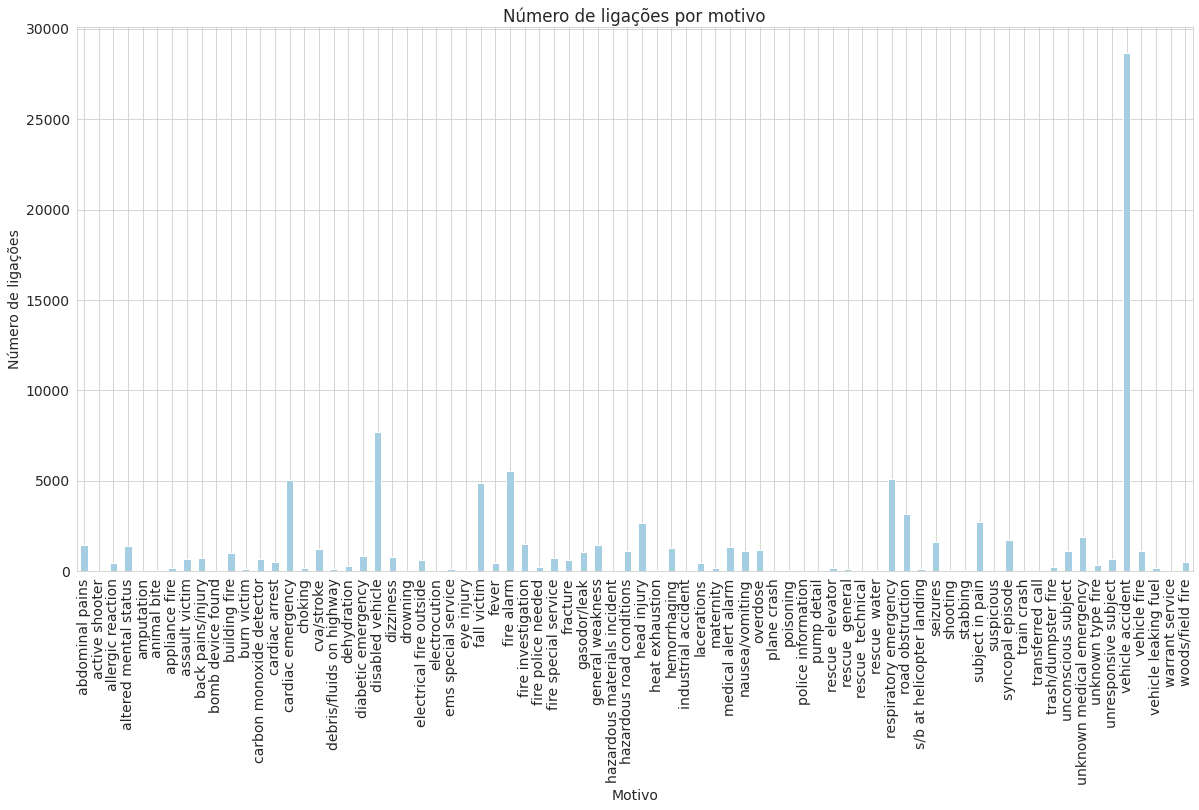

In [47]:
plot_simple_value_counts(df, RSN, 'Número de ligações por motivo', 'Motivo', 'Número de ligações', L)

Text(0, 0.5, 'Número de ligações')

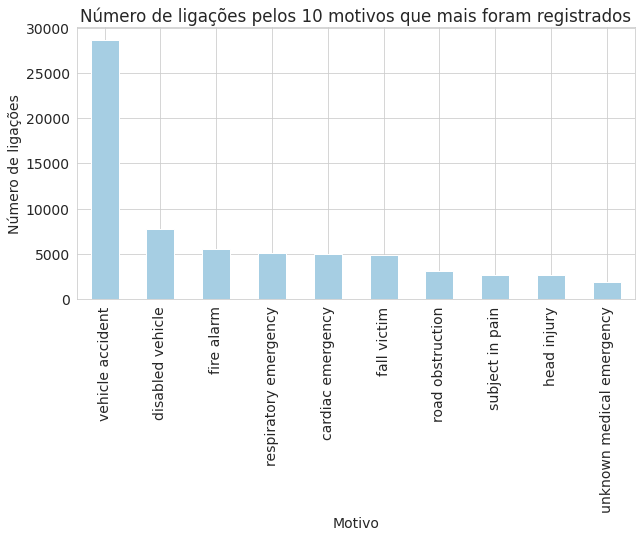

In [48]:
df[RSN].value_counts().head(10).plot.bar(title='Número de ligações pelos 10 motivos que mais foram registrados', figsize=M, colormap=CM)
plt.xlabel('Motivo')
plt.ylabel('Número de ligações')

### Ligações por serviço

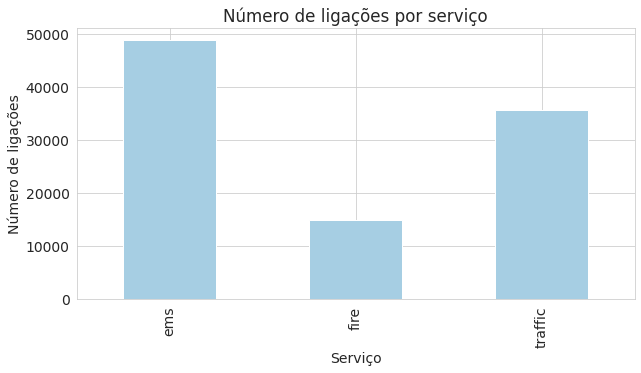

In [49]:
plot_simple_value_counts(df, SVC, 'Número de ligações por serviço', 'Serviço', 'Número de ligações')

### Ligações por cidade

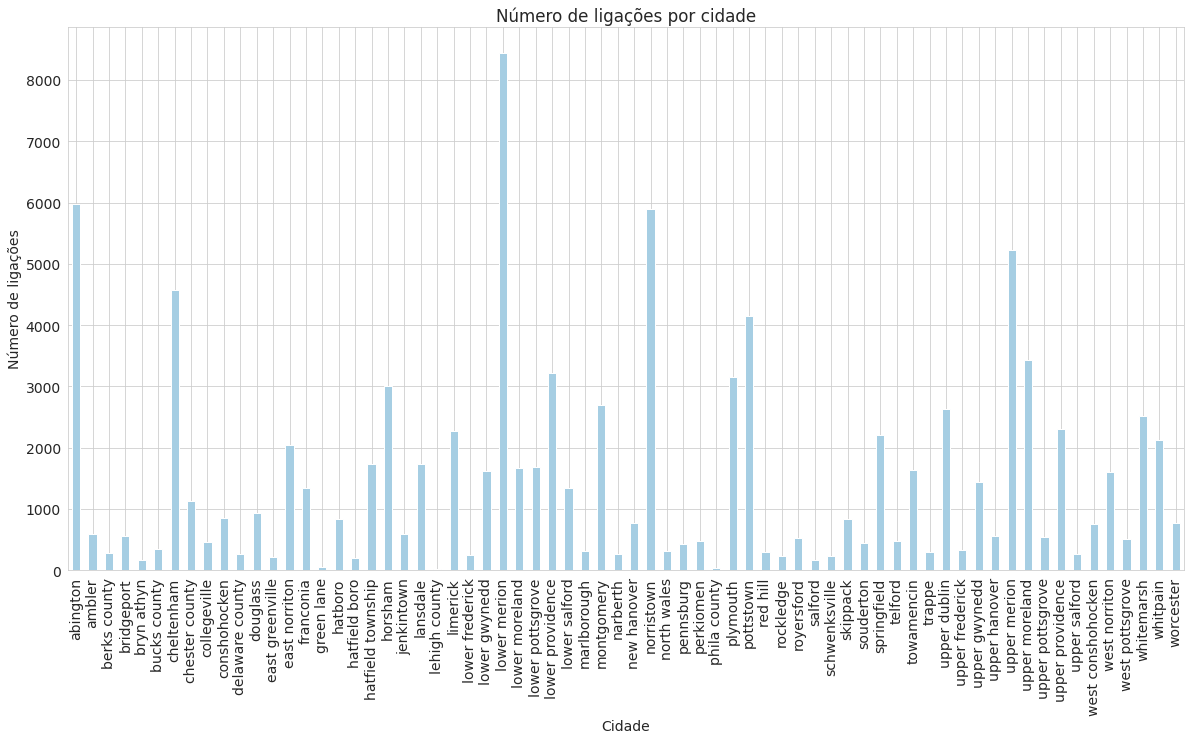

In [50]:
plot_simple_value_counts(df, TWP, 'Número de ligações por cidade', 'Cidade', 'Número de ligações', L)

Text(0, 0.5, 'Número de ligações')

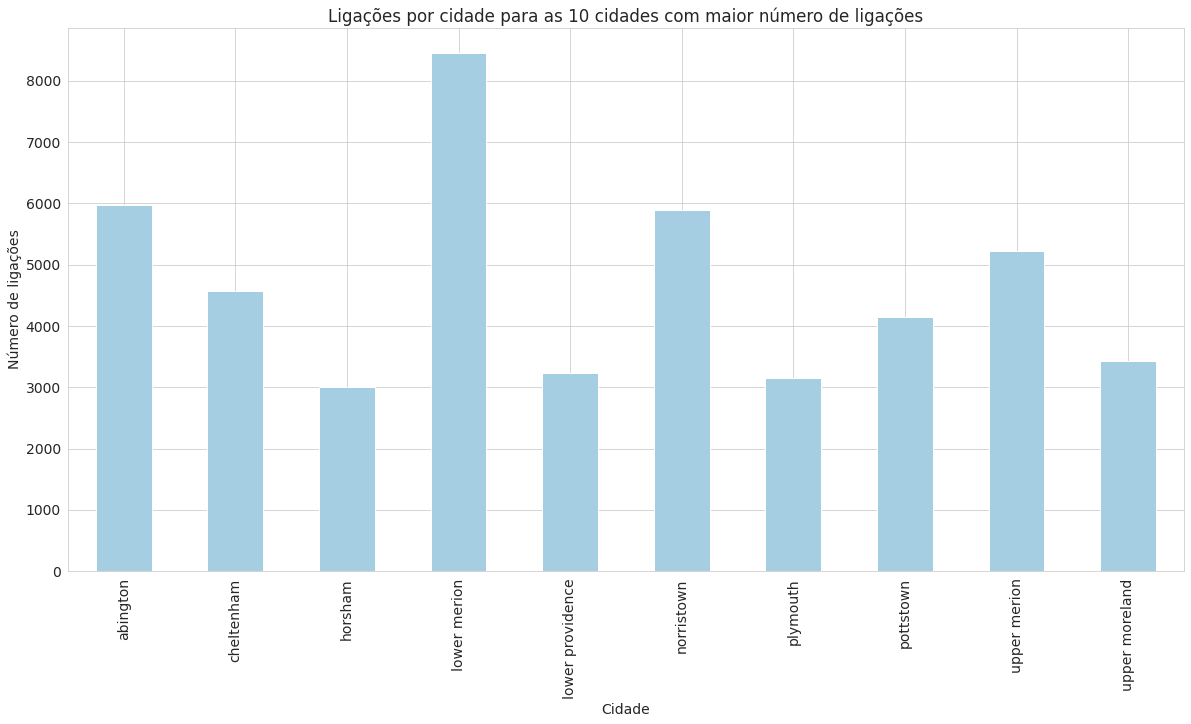

In [51]:
df[TWP].value_counts()[:10].sort_index().plot.bar(title='Ligações por cidade para as 10 cidades com maior número de ligações', figsize=L, colormap=CM)
plt.xlabel('Cidade')
plt.ylabel('Número de ligações')

### Ligações por serviço e mês

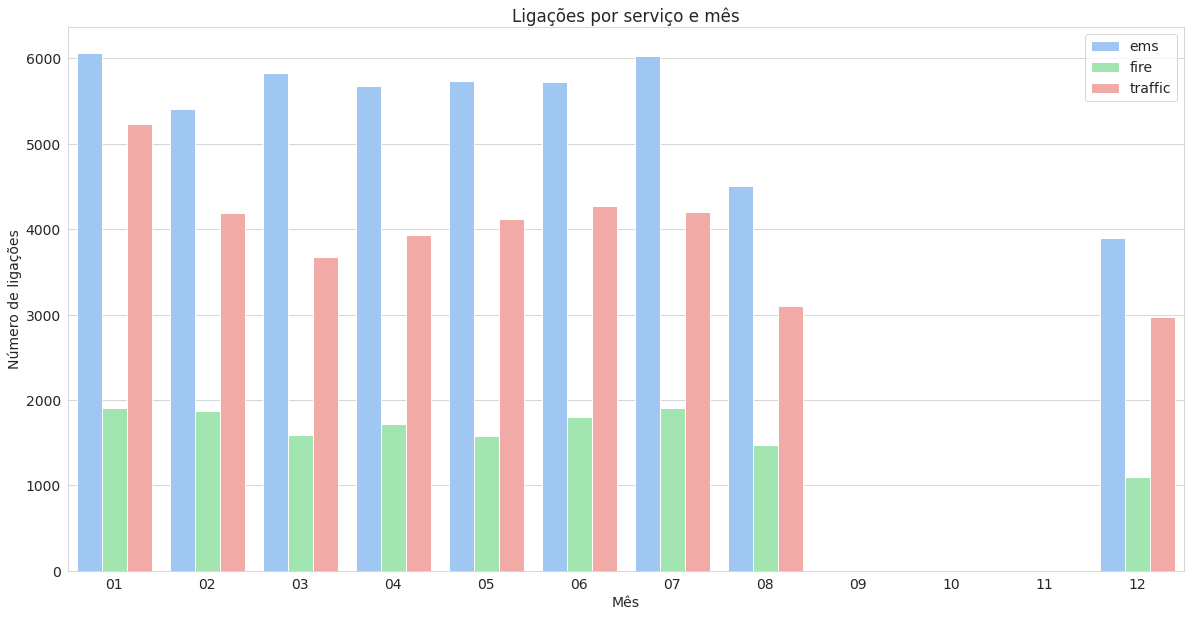

In [52]:
plot_simple_sns_count_with_hue('Ligações por serviço e mês', 'Mês', 'Número de ligações', MONTH, df, SVC, months.keys(), L)

### Ligações por serviço e dia do mês

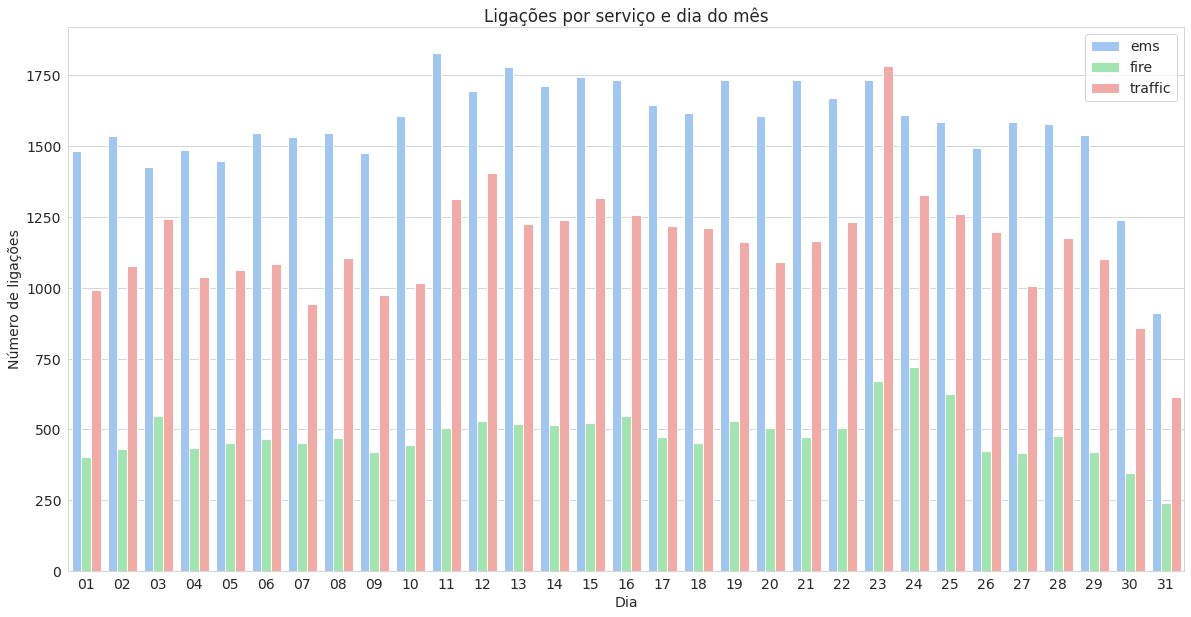

In [53]:
order = ['{:02d}'.format(i) for i in range(1, 32)]
plot_simple_sns_count_with_hue('Ligações por serviço e dia do mês', 'Dia', 'Número de ligações', DAY, df, SVC, order, L)

### Ligações por serviço e dia da semana

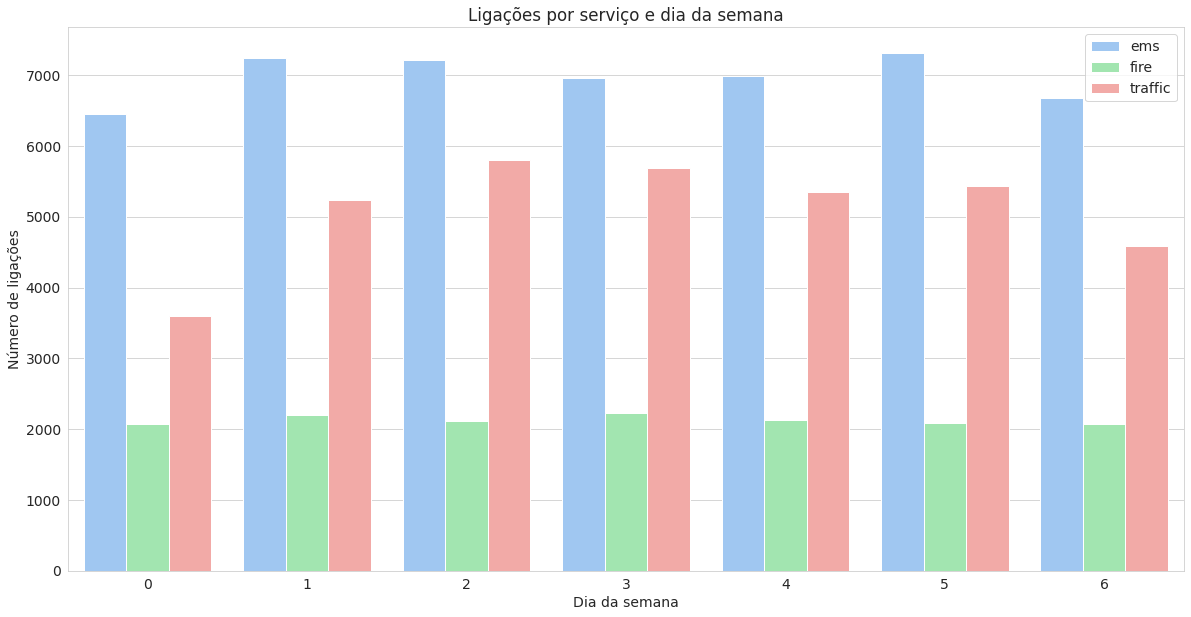

In [54]:
plot_simple_sns_count_with_hue('Ligações por serviço e dia da semana', 'Dia da semana', 'Número de ligações', WEEKDAY, df, SVC, weekdays.keys(), L)

### Ligações por serviço e período

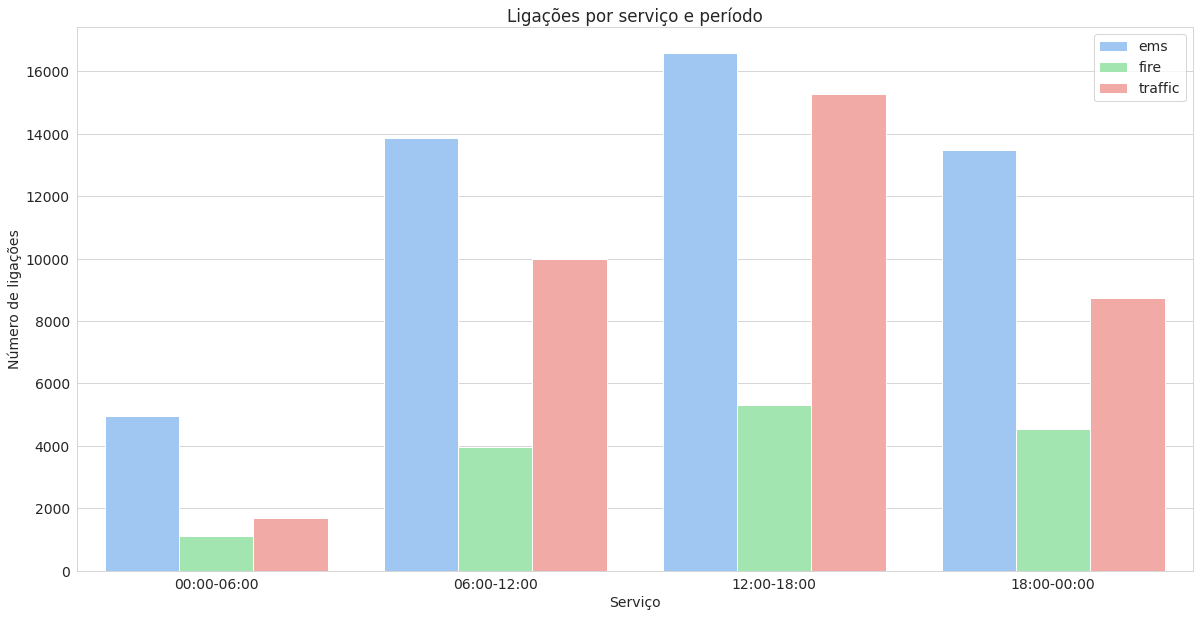

In [57]:
plot_simple_sns_count_with_hue('Ligações por serviço e período', 'Serviço', 'Número de ligações', P, df, SVC, ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-00:00'], L)

### Ligações por serviço e hora

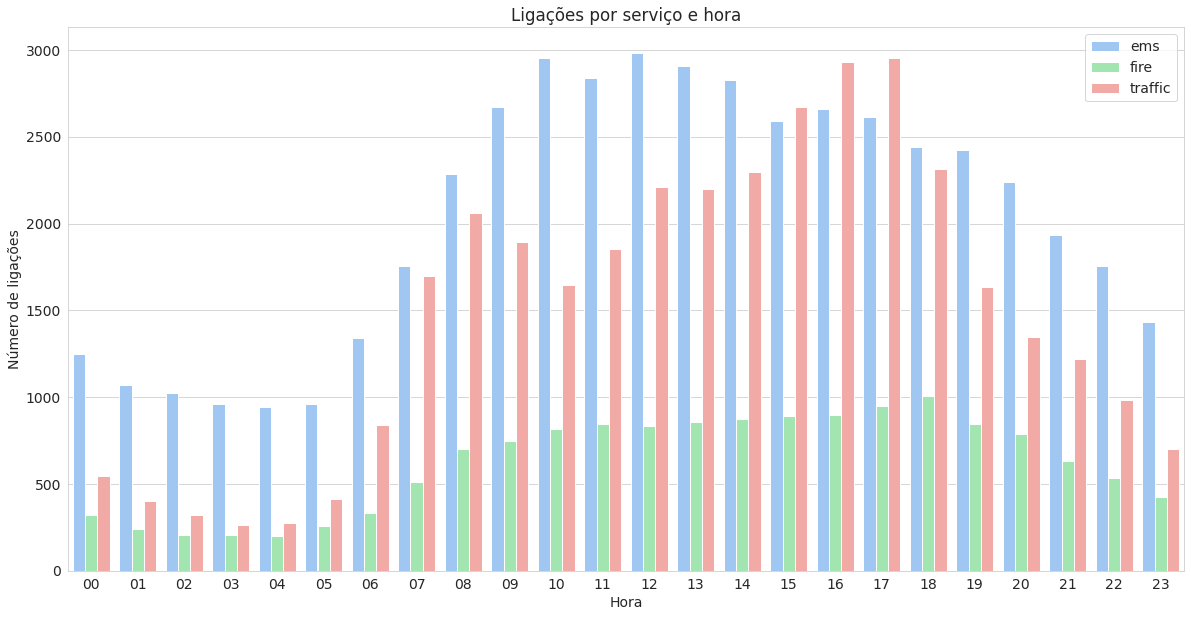

In [55]:
order = ["{:02d}".format(i) for i in range(24)]
plot_simple_sns_count_with_hue('Ligações por serviço e hora', 'Hora', 'Número de ligações', HOUR, df, SVC, order, L)

### Ligações por serviço e cidade

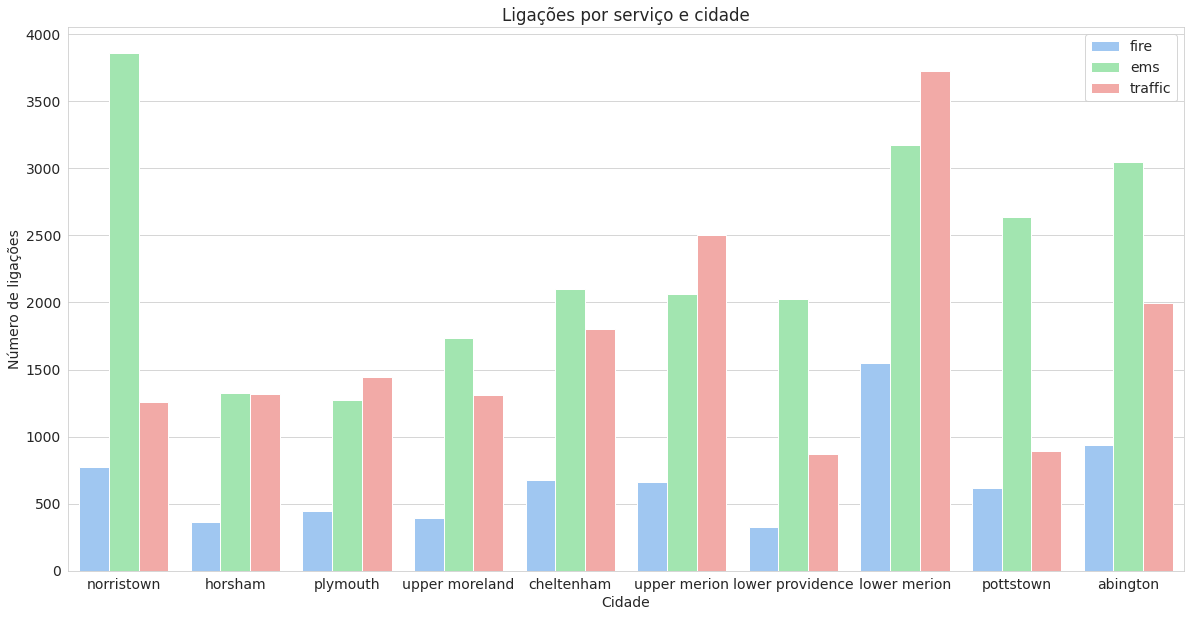

In [56]:
towns = [town for town in df[TWP].value_counts()[:10].index]
plot_simple_sns_count_with_hue('Ligações por serviço e cidade', 'Cidade', 'Número de ligações', TWP, df.loc[df[TWP].isin(towns)], SVC, None, L)